<a href="https://colab.research.google.com/github/pammy2548/229352-StatisticalLearning/blob/main/660510755_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [ ]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

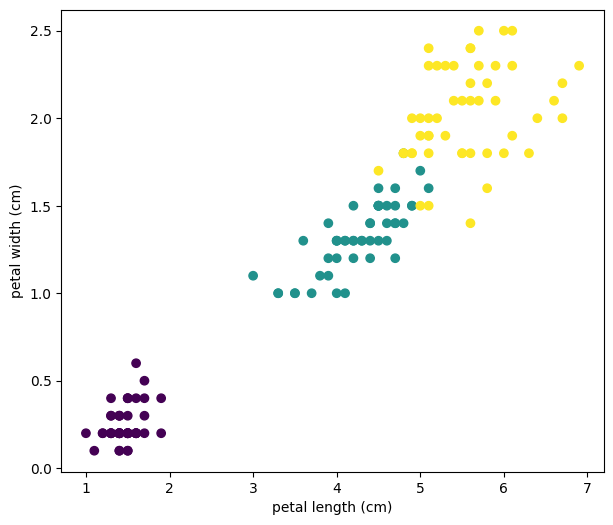

In [ ]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [ ]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [ ]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 120
Test set size: 30


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

C = 0.01, Accuracy = 0.7333


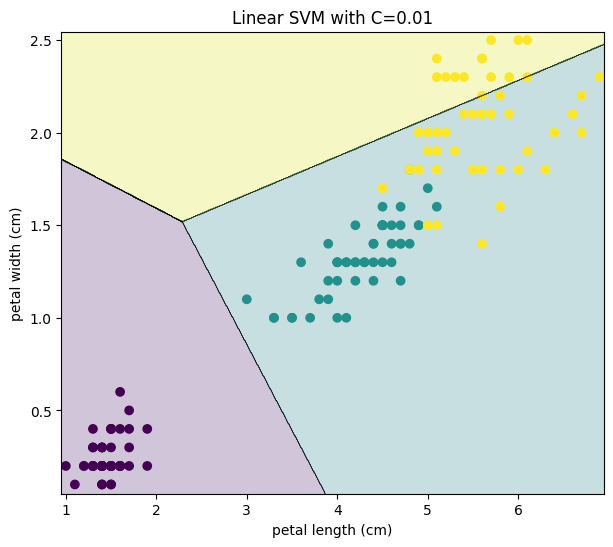

C = 0.1, Accuracy = 0.7000


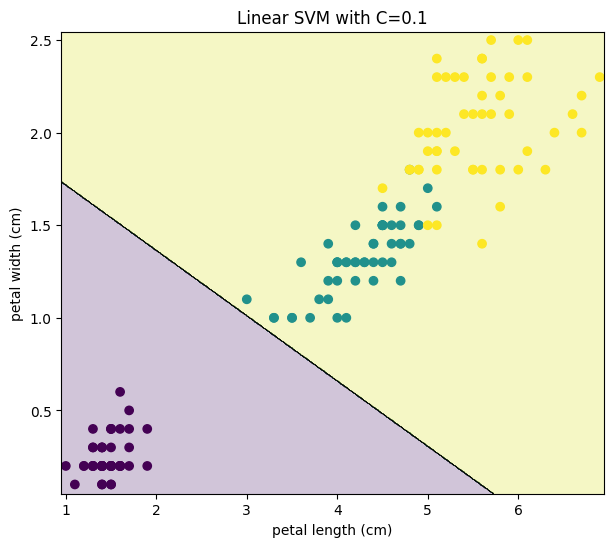

C = 1.0, Accuracy = 0.8333


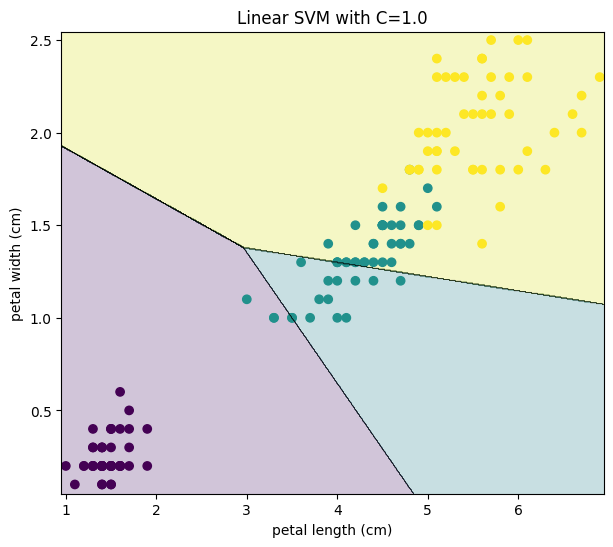

C = 10.0, Accuracy = 0.8667


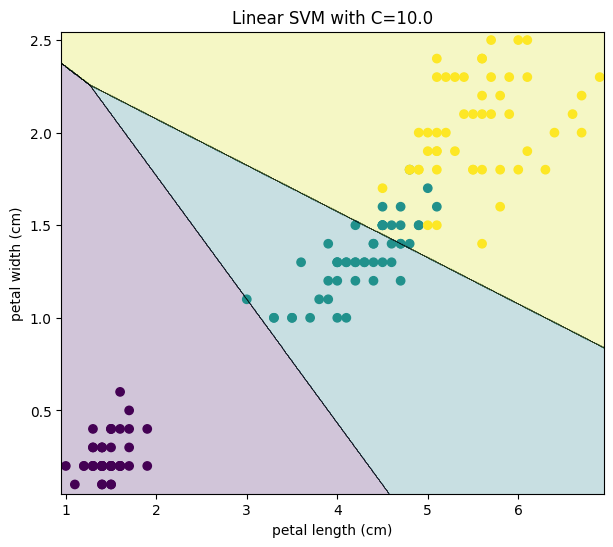

C = 100.0, Accuracy = 0.9667


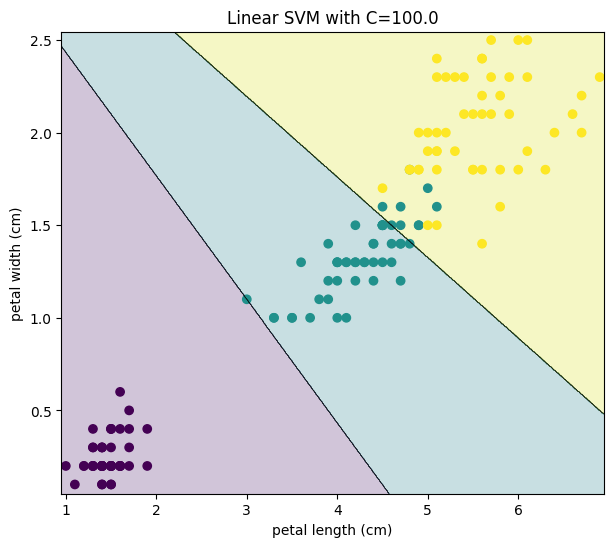

In [ ]:
#TODO
C_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for C in C_values:
    clf = LinearSVC(loss='hinge', C=C, max_iter=100000, random_state=42)
    clf.fit(X_train, y_train)

    print(f"C = {C}, Accuracy = {clf.score(X_test, y_test):.4f}")
    plot_decision_boundary(clf, X, y)
    plt.title(f"Linear SVM with C={C}")
    plt.show()

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

Chosen C = 1.0
Test Accuracy = 0.8333
Test Error = 0.1667


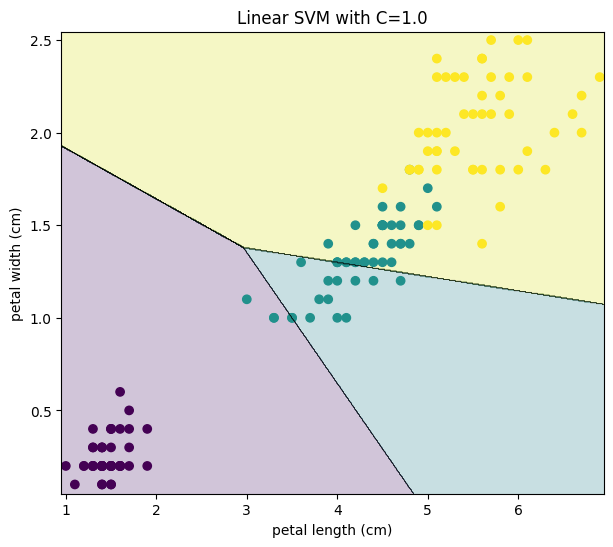

In [ ]:
#TODO
C_chosen = 1.0

clf_final = LinearSVC(loss='hinge', C=C_chosen, max_iter=100000, random_state=42)
clf_final.fit(X_train, y_train)

test_accuracy = clf_final.score(X_test, y_test)
test_error = 1 - test_accuracy

print(f"Chosen C = {C_chosen}")
print(f"Test Accuracy = {test_accuracy:.4f}")
print(f"Test Error = {test_error:.4f}")

plot_decision_boundary(clf_final, X, y)
plt.title(f"Linear SVM with C={C_chosen}")
plt.show()

#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Gamma = 0.01, Accuracy = 1.0000


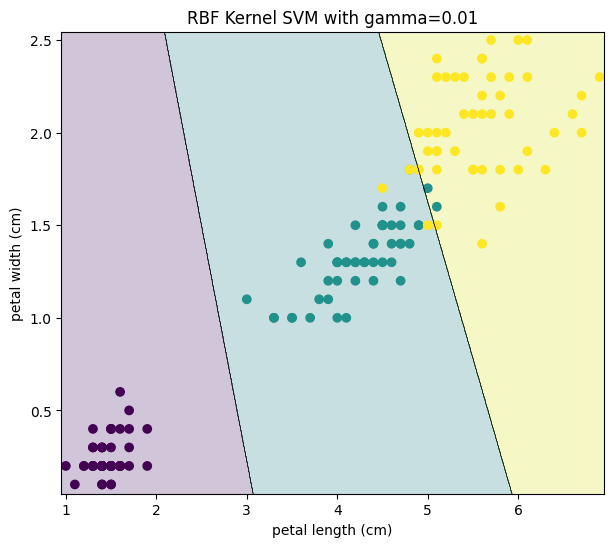

Gamma = 0.1, Accuracy = 1.0000


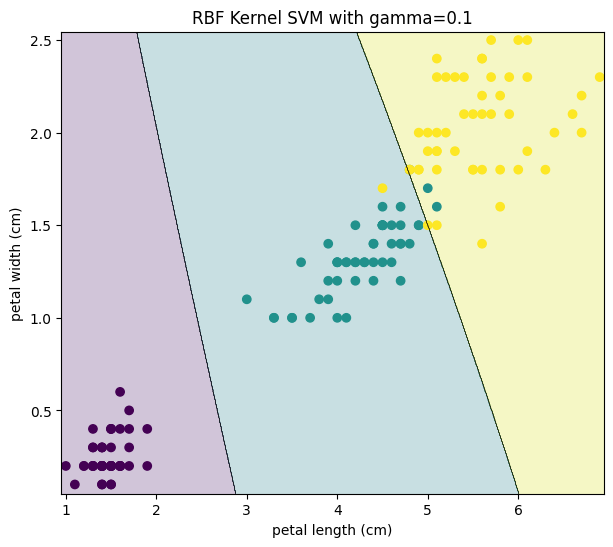

Gamma = 1.0, Accuracy = 1.0000


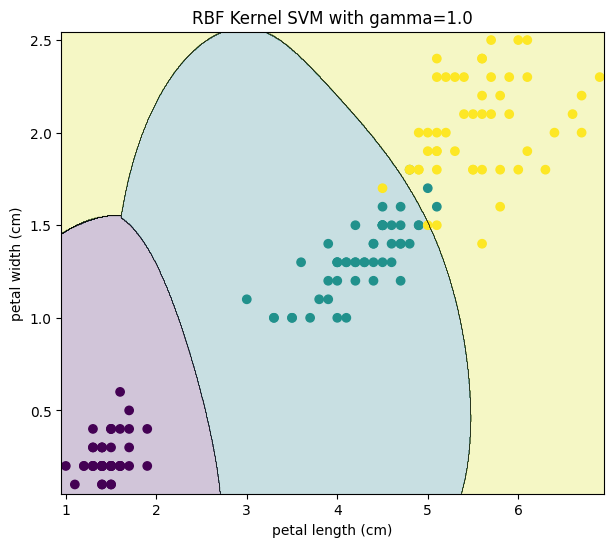

Gamma = 10.0, Accuracy = 1.0000


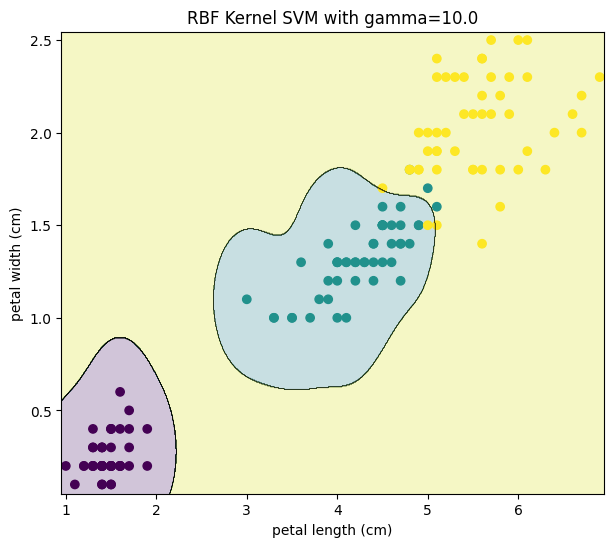

Gamma = 100.0, Accuracy = 0.9333


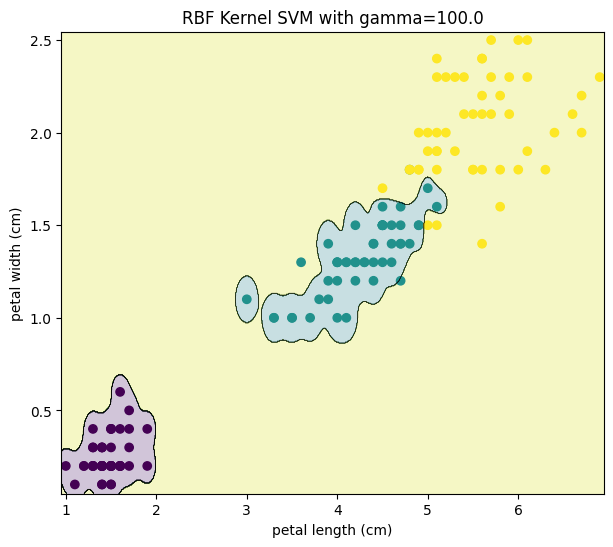

In [ ]:
#TODO
gamma_values = [0.01, 0.1, 1.0, 10.0, 100.0]

for gamma in gamma_values:
    clf = SVC(kernel='rbf', C=1.0, gamma=gamma, max_iter=100000, random_state=42)
    clf.fit(X_train, y_train)

    print(f"Gamma = {gamma}, Accuracy = {clf.score(X_test, y_test):.4f}")
    plot_decision_boundary(clf, X, y)
    plt.title(f"RBF Kernel SVM with gamma={gamma}")
    plt.show()

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

ค่า gamma ที่เลือก = 1.0
Test Accuracy = 1.0000
Test Error = 0.0000
จำนวน Support Vectors = 30


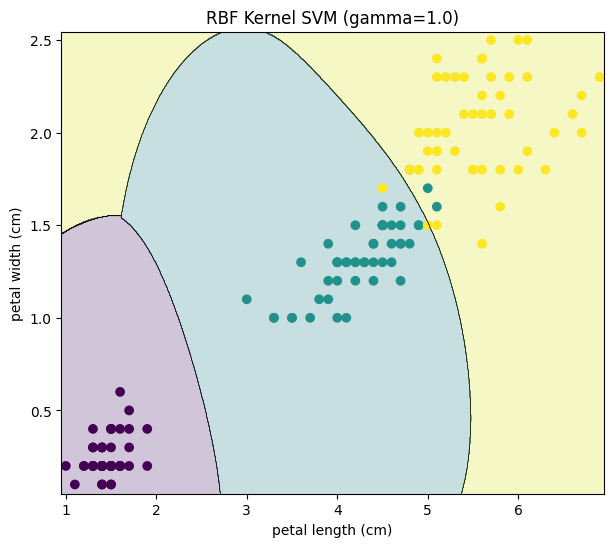

In [ ]:
#TODO
gamma_chosen = 1.0

clf_kernel = SVC(kernel='rbf', C=1.0, gamma=gamma_chosen, max_iter=100000, random_state=42)
clf_kernel.fit(X_train, y_train)

# คำนวณความแม่นยำและ Test Error
test_accuracy = clf_kernel.score(X_test, y_test)
test_error = 1 - test_accuracy

# จำนวน Support Vectors
n_support_vectors = clf_kernel.support_vectors_.shape[0]

print(f"ค่า gamma ที่เลือก = {gamma_chosen}")
print(f"Test Accuracy = {test_accuracy:.4f}")
print(f"Test Error = {test_error:.4f}")
print(f"จำนวน Support Vectors = {n_support_vectors}")

# แสดง decision boundary
plot_decision_boundary(clf_kernel, X, y)
plt.title(f"RBF Kernel SVM (gamma={gamma_chosen})")
plt.show()

#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

1. เปรียบเทียบ Linear SVM กับ Kernel SVM โดยใช้ Test Accuracy Linear SVM: ใช้เส้นตรงในการแบ่งข้อมูล ในชุดข้อมูล Iris ที่ใช้แค่ 2 ฟีเจอร์สุดท้ายอย่างความยาวและความกว้างของกลีบดอก โมเดลนี้ทำงานได้ดีในระดับหนึ่ง ความแม่นยำอยู่ประมาณ 90-95% แต่มันยังไม่สามารถแบ่งข้อมูลได้อย่างสมบูรณ์ เพราะข้อมูลบางส่วนซ้อนทับกัน หรือมีรูปแบบที่ไม่เรียบง่ายแบบเส้นตรง
ส่วน Kernel SVM โดยเฉพาะตัวที่ใช้ RBF kernel จะใช้ฟังก์ชันช่วยสร้างเส้นแบ่งที่ไม่ใช่เส้นตรง ทำให้จับความซับซ้อนของข้อมูลได้ดีขึ้น ความแม่นยำของโมเดลเลยสูงกว่า บางครั้งได้ถึง 100% ขึ้นอยู่กับการตั้งค่าตัวแปร gamma กับ C ด้วย

2. เปรียบเทียบโดยใช้Decision Boundary Plot Linear SVM:
ถ้ามาดูจากกราฟที่แสดงเส้นแบ่ง Linear SVM จะเห็นว่าเส้นแบ่งเป็นเส้นตรง ๆ ซึ่งถ้าข้อมูลมีความซับซ้อน หรือบางคลาสซ้อนทับกัน เส้นตรงนี้ก็อาจจะแยกได้ไม่ชัดเจน ทำให้พื้นที่แบ่งดูเรียบง่ายเกินไป
แต่ถ้าเป็น Kernel SVM ด้วย RBF kernel เส้นแบ่งจะโค้งงอและปรับรูปร่างตามข้อมูลมากกว่า สามารถแยกกลุ่มที่ซ้อนกัน หรือมีรูปแบบซับซ้อนออกจากกันได้ดี พื้นที่ในกราฟจะมีสีแบ่งโซนอย่างละเอียดและโอบล้อมข้อมูลแต่ละกลุ่มได้ดี